In [1]:
!pip install --upgrade scikit-learn

^C


In [1]:
import sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import random
import seaborn as sns

In [3]:
from matplotlib.lines import Line2D 

def generateRandomRGB(n):
    colors = [(random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), 
               random.uniform(0.0, 1.0)) for i in range(n)]
    return colors

def plotData(X, y, colors=None, markers=None, title=''):
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)
    
    if(colors is None):
        colors = generateRandomRGB(n_classes)
    if(markers is None):
        markers = list(Line2D.markers.keys())
        
    for class_index in range(n_classes):
        plt.scatter(X[y == unique_classes[class_index],0], X[y == unique_classes[class_index],1], 
                    label=unique_classes[class_index], c=colors[class_index],
                    marker=markers[class_index])
        plt.title(title)
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

In [4]:
pokemon_train = pd.read_csv("Pokemon_train.csv")
pokemon_test = pd.read_csv("Pokemon_test.csv")

In [5]:
pokemon_train.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,50.000000,6.000000e+05,0.700000,45.000000,88.100000,347.000000,40.000000,50.000000,75.000000,rock
1,0.990403,1.0,0.990403,1.000000,0.990403,2.038386,0.509597,0.495202,1.0,1.980807,...,130.287898,1.058711e+06,1.694242,84.520170,50.000000,525.040340,60.287898,81.343524,25.287898,rock
2,1.000000,1.0,1.000000,2.000000,1.000000,1.000000,0.500000,1.000000,1.0,2.000000,...,50.000000,1.059860e+06,0.400000,50.000000,88.100000,258.000000,50.000000,50.000000,40.000000,water
3,0.500000,1.0,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.0,0.500000,...,61.282340,1.000000e+06,1.028234,66.831914,85.773470,196.636341,100.495741,107.252130,68.297445,fire
4,0.334368,0.5,0.000000,1.662527,1.000000,0.334368,1.000000,1.000000,1.0,0.668737,...,87.575591,8.000000e+05,1.432505,88.374731,66.670456,322.211607,111.563172,106.563172,73.250537,fairy


In [6]:
pokemon_train["type1"].value_counts()

fairy       83
rock        77
dragon      76
electric    76
bug         76
ghost       75
water       74
grass       74
fire        74
steel       73
dark        72
poison      72
ice         71
ground      71
fighting    70
psychic     69
normal      68
Name: type1, dtype: int64

In [7]:
pokemon_train.isna().sum()

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
dtype: int64

In [8]:
X_train, y_train = pokemon_train.iloc[:, :-1], pokemon_train.iloc[:, -1]
X_test, y_test = pokemon_test.iloc[:, :-1], pokemon_test.iloc[:, -1]

## Apply Gaussian Naive Bayes Baseline Model

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [10]:
baseline_gnb_clf = GaussianNB()
baseline_gnb_clf.fit(X_train, y_train)

GaussianNB()

In [215]:
baseline_gnb_preds = baseline_gnb_clf.predict(X_test)
baseline_gnb_accuracy = accuracy_score(y_test, baseline_gnb_preds)
print("Gaussian NB Accuracy = {:.2f}%".format(baseline_gnb_accuracy))

Gaussian NB Accuracy = 0.51%


## Apply SVM Baseline Model

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [31]:
baseline_svc_clf = SVC(probability=True, gamma='auto')
baseline_svc_clf.fit(X_train, y_train)
baseline_svc_preds = baseline_svc_clf.predict(X_test)
baseline_svc_acc = accuracy_score(baseline_svc_preds, y_test)
print(baseline_svc_acc)

0.18210862619808307


In [32]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

svm_grid = GridSearchCV(SVC(), param_grid, verbose=1)
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 1e-05, 10]},
             verbose=1)

In [33]:
svm_preds = svm_grid.best_estimator_.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy = {:.2f}%".format(svm_accuracy))

SVM Accuracy = 0.73%


# Apply T-SNE to Visualize the Data

In [12]:
from sklearn.manifold import TSNE

In [58]:
tsne = TSNE(n_components=2, random_state=0)
X_train_reduced = tsne.fit_transform(X_train)

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

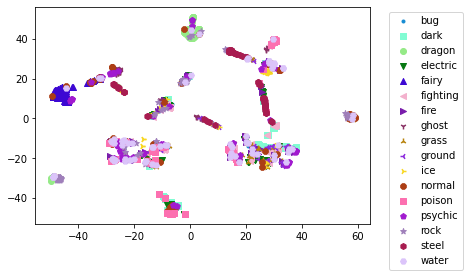

In [59]:
colors = generateRandomRGB(len(y_train.unique()))
plotData(X_train_reduced, y_train, colors)

# Apply KMeans

In [17]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'SSE')

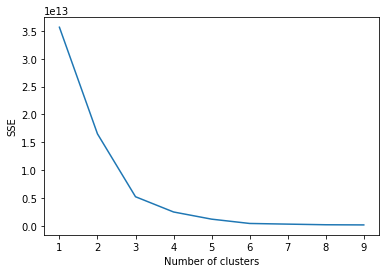

In [107]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit(X_train)
    sse.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 10), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [62]:
X_train_kmeans = X_train.copy()
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=0).fit(X_train)
X_train_kmeans["centroid"] = kmeans.fit_predict(X_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


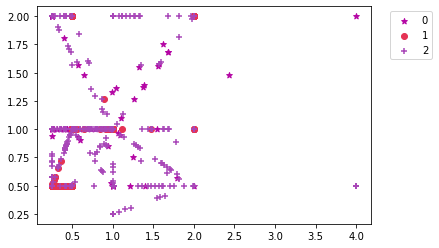

In [63]:
# Visualize the TSNE reduced features with kmeans
plotData(X_train.to_numpy(), X_train_kmeans["centroid"], markers=["*", 'o', '+'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


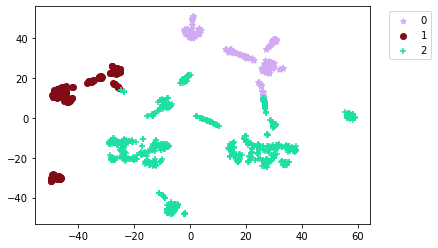

In [64]:
# Plot the first 2 features of X_train with their clusters
plotData(X_train_reduced, X_train_kmeans["centroid"], markers=["*", 'o', '+'])

# Tuning PCA n_components with Baseline Models

In [65]:
from sklearn.decomposition import PCA

In [66]:
def tune_pca(clf, X_trian, y_train, X_test, y_test, n_min, n_max):
    accs = []
    for i in range(n_min, n_max):
        pca = PCA(n_components=i, random_state=0)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        clf.fit(X_train_pca, y_train)
        preds = clf.predict(X_test_pca)
        accuracy = accuracy_score(y_test, preds)
        accs.append(accuracy)
    return accs

def visualize_accs(baseline_acc, pca_accs, clf_name, operation='PCA', xlabel='n_components'):
    plt.plot(pca_accs, label=f'{operation} {clf_name} Accuracy')
    plt.plot([baseline_acc]*len(pca_accs), label=f'Baseline {clf_name} Accuracy')
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

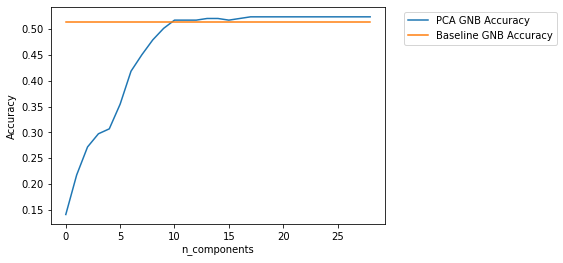

In [67]:
accs = tune_pca(GaussianNB(), X_train, y_train, X_test, y_test, 1, 30)
visualize_accs(baseline_gnb_accuracy, accs, "GNB")

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with featu

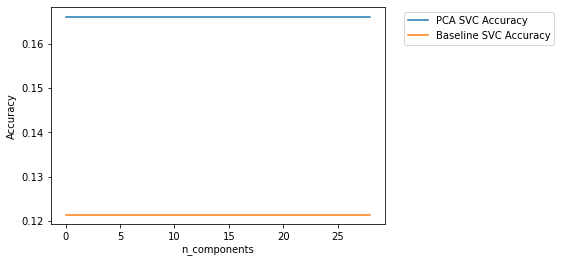

In [68]:
accs = tune_pca(baseline_svc_clf, X_train, y_train, X_test, y_test, 1, 30)
visualize_accs(baseline_svc_acc, accs, "SVC")

According to both plots, 10 is the best number of components.

In [69]:
pca = PCA(n_components=10, random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Feature Selection by Filtering

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif

In [15]:
def select_features(X_train, y_train, X_test, y_test, clf, fs):
    fs.fit(X_train, y_train)
    X_train_best_features = fs.transform(X_train)
    X_test_best_features = fs.transform(X_test) 
    clf.fit(X_train_best_features, y_train)
    y_pred = clf.predict(X_test_best_features)
    acc = accuracy_score(y_test, y_pred)
    return acc

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature n

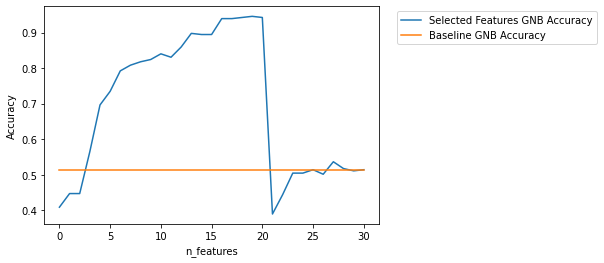

In [72]:
accs = []
for n in range(2, 33):
    fs =  SelectKBest(f_classif, k=n)
    acc = select_features(X_train, y_train, X_test, y_test, baseline_gnb_clf, fs)
    accs.append(acc)
visualize_accs(baseline_gnb_accuracy, accs, "GNB", operation='Selected Features', xlabel='n_features')

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with featu

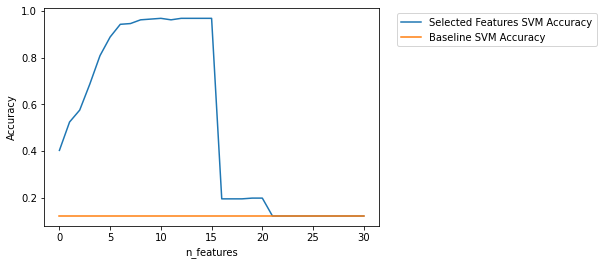

In [73]:
accs = []
for n in range(2, 33):
    fs =  SelectKBest(f_classif, k=n)
    acc = select_features(X_train, y_train, X_test, y_test, baseline_svc_clf, fs)
    accs.append(acc)
visualize_accs(baseline_svc_acc, accs, "SVM", operation='Selected Features', xlabel='n_features')

# Feature Selection by Wrapping

In [35]:
from sklearn.feature_selection import SequentialFeatureSelector

n_features = 2


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 3


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 4


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 5


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 6


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 7


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 8


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 9


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 10


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 11


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 12


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 13


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 14


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 15


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 16


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 17


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 18


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 19


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 20


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 21


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 22


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 23


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 24


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 25


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 26


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 27


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 28


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 29


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 30


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


n_features = 31


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


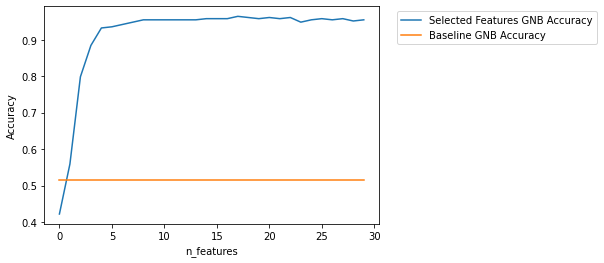

In [75]:
accs = []
for n in range(2,32):
    print(f"n_features = {n}")
    fs = SequentialFeatureSelector(baseline_gnb_clf, n_features_to_select=n)
    acc = select_features(X_train, y_train, X_test, y_test, baseline_gnb_clf, fs)
    accs.append(acc)

gnb_wrapper_best_n = np.argmax(accs) + 2
visualize_accs(baseline_gnb_accuracy, accs, "GNB", operation='Selected Features', xlabel='n_features')

With less than 10 features, Gaussian NB is achieving more than 90% accuracy. This accuracy remains high until 31 features, meaning that there was only one specific (the 32nd feature) that has been driving the accuracy down. This feature is experience_growth as shown below.

In [77]:
clf = GaussianNB()

fs = SequentialFeatureSelector(clf, n_features_to_select=31)
fs.fit(X_train, y_train)

good_features = X_train.columns[fs.get_support()]
set(X_train.columns) - set(good_features)

{'experience_growth'}

In [37]:
accs = []
for n in range(2, 32):
    print(f"n_features = {n}")
    fs = SequentialFeatureSelector(svm_grid , n_features_to_select=n)
    acc = select_features(X_train, y_train, X_test, y_test, svm_grid , fs)
    accs.append(acc)

svm_wrapper_best_n = np.argmax(accs) + 2
visualize_accs(svm_accuracy , accs, "SVM", operation='Selected Features', xlabel='n_features')

n_features = 2
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 12

KeyboardInterrupt: 

# From Filter Methods we will choose  18 features 

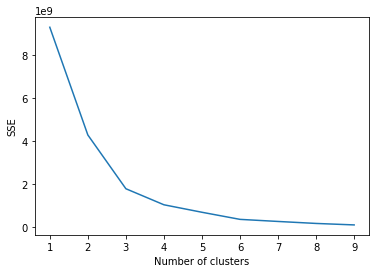

In [18]:
sse = []
for k in range(1, 10):
    fs =  SelectKBest(f_classif, k=18)
    fs.fit(X_train, y_train)
    X_train_best_features = fs.transform(X_train)
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=0).fit( X_train_best_features)
    sse.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 10), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

sse = []
for k in range(1, 10):
    KM= KMeans(n_clusters=k, max_iter=1000, random_state=0)
    fs = SequentialFeatureSelector(KM, n_features_to_select=15)
    fs.fit(X_train, y_train)
    X_train_best_features = fs.transform(X_train)
    
    kmeans = KM.fit( X_train_best_features)
    sse.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1, 10), sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

# SOM algorithm with  Filter Methods

In [19]:
from sklearn_som.som import SOM

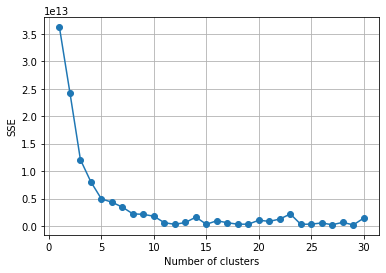

In [20]:

sse = []
for k in range(1, 31):
    fs =  SelectKBest(f_classif, k=23)
    fs.fit(X_train, y_train)
    X_train_best_features = fs.transform(X_train)
    SOM_model= SOM(m=k, n=1, dim= X_train_best_features.shape[1],max_iter=3000)
    labels=SOM_model.fit_predict( X_train_best_features)
    sse.append(SOM_model.inertia_)
plt.figure()
plt.plot(range(1, 31), sse, marker = 'o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.grid(True)


In [124]:
fs =  SelectKBest(f_classif, k=23)
fs.fit(X_train, y_train)
X_train_best_features = fs.transform(X_train)
SOM_model= SOM(m=10, n=1, dim= X_train_best_features.shape[1],max_iter=3000)
SOM_model.fit_predict( X_train_best_features)

array([9, 0, 0, ..., 6, 9, 4], dtype=int64)

In [125]:
SOM_model.weights
    

array([[1.04240343e+00, 9.20950445e-01, 9.73793624e-01, 8.61333278e-01,
        1.17080944e+00, 1.09015128e+00, 1.16810714e+00, 1.28371154e+00,
        1.00968172e+00, 9.97968373e-01, 1.29186423e+00, 1.31839771e+00,
        8.91700678e-01, 8.82918154e-01, 1.08914692e+00, 9.30858845e-01,
        8.41539356e-01, 1.08946399e+00, 8.27612260e+01, 5.30683774e+03,
        6.82932609e+01, 7.72435370e+01, 1.06223008e+06],
       [9.33992421e-01, 9.43593959e-01, 8.97125314e-01, 8.75504939e-01,
        1.05049422e+00, 1.47609201e+00, 1.17249960e+00, 1.07650983e+00,
        1.01520064e+00, 1.02223173e+00, 1.59557392e+00, 1.21850967e+00,
        7.68936235e-01, 7.07627764e-01, 9.56222104e-01, 9.37924547e-01,
        9.22487712e-01, 1.28661448e+00, 8.80364883e+01, 5.76125303e+03,
        6.39855419e+01, 9.29911845e+01, 1.07948326e+06],
       [7.78798593e-01, 1.05667940e+00, 1.04314362e+00, 8.14854127e-01,
        1.04897917e+00, 1.80664185e+00, 1.05539136e+00, 8.04764137e-01,
        1.07621245e+00

Intial Neuron positions  1.042403432316218 0.9209504447698568
Final Neuron positions  78.40655160141304 70.37986745496856


Text(0, 0.5, 'Y')

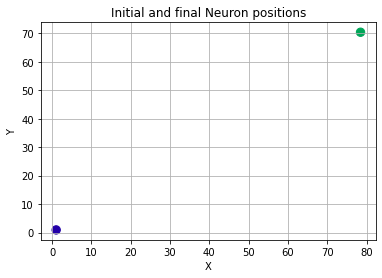

In [126]:
print("Intial Neuron positions ",SOM_model.weights[0][0],SOM_model.weights[0][1])
print("Final Neuron positions ",SOM_model.weights[9][-3],SOM_model.weights[9][-2])
x=[SOM_model.weights[0][0],SOM_model.weights[9][-3]]
y=[SOM_model.weights[0][1],SOM_model.weights[9][-2]]
plt.scatter(x,y,70,color = ['#2300A8', '#00A658'])
plt.title("Initial and final Neuron positions")
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")



# BSCAN

In [22]:
from sklearn.cluster import DBSCAN

In [134]:
eps_list=[]
min_samples_list=[]
n_clusters_=[]
for i in range(2,15,1):#2-15
    for j in np.arange(0.2,3,0.01): #(0.2-3
        model=DBSCAN(eps=j, min_samples=i)
        model.fit(X_train)
        min_samples_list.append(i)
        eps_list.append(j)
        n_clusters_.append(len(set(model.labels_)) - (1 if -1 in model.labels_ else 0))#remove outlier class (-1)

In [142]:
for i in range(len(n_clusters_)):
 
  if  n_clusters_[i]==4 :
    print("min_samples = ",min_samples_list[i])
    print("eps = ",eps_list[i],"\n_________")


min_samples =  2
eps =  0.6200000000000003 
_________
min_samples =  2
eps =  0.6300000000000003 
_________
min_samples =  2
eps =  0.6400000000000003 
_________
min_samples =  2
eps =  0.6500000000000004 
_________
min_samples =  2
eps =  0.6600000000000004 
_________
min_samples =  2
eps =  0.6700000000000004 
_________
min_samples =  2
eps =  0.6800000000000004 
_________
min_samples =  2
eps =  0.6900000000000004 
_________
min_samples =  2
eps =  0.7000000000000004 
_________
min_samples =  2
eps =  0.7100000000000004 
_________
min_samples =  2
eps =  0.7200000000000004 
_________
min_samples =  2
eps =  0.7300000000000004 
_________
min_samples =  2
eps =  0.7400000000000004 
_________
min_samples =  2
eps =  0.7500000000000004 
_________
min_samples =  2
eps =  0.7600000000000005 
_________
min_samples =  2
eps =  0.7700000000000005 
_________
min_samples =  2
eps =  0.7800000000000005 
_________
min_samples =  2
eps =  0.7900000000000005 
_________
min_samples =  2
eps =  0.80

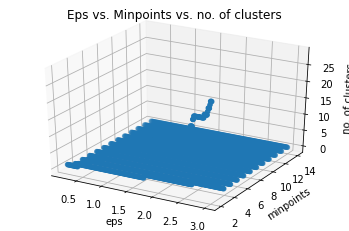

In [143]:
fig = plt.figure()
ax = plt.axes(projection='3d') 
ax.scatter3D(eps_list,min_samples_list , n_clusters_, 'Green')

ax.set_title("Eps vs. Minpoints vs. no. of clusters")

ax.set_xlabel("eps")

ax.set_ylabel("minpoints")

ax.set_zlabel("no. of clusters")

plt.show()
 